In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
tf.random.set_seed(3)

In [57]:
import cv2
from PIL import Image

In [58]:
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST Dataset

In [59]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [60]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

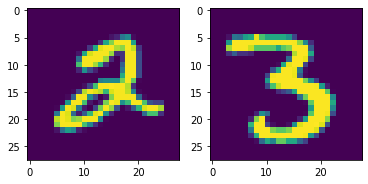

In [61]:
plt.subplot(1,2,1)
img = Image.fromarray(X_train[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_train[12])
plt.imshow(img)

Setting up the Layers of NN

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(40,activation='relu'),
    keras.layers.Dense(80,activation='relu'),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
                        ])

In [63]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
            )

In [64]:
history = model.fit(X_train,Y_train,validation_split=0.25,epochs=50)

Epoch 1/50
1407/1407 [==============================] - 13s 9ms/step - loss: 1.1604 - accuracy: 0.7520 - val_loss: 0.4183 - val_accuracy: 0.8858
Epoch 2/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3698 - accuracy: 0.8977 - val_loss: 0.3242 - val_accuracy: 0.9133
Epoch 3/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.2836 - accuracy: 0.9200 - val_loss: 0.2636 - val_accuracy: 0.9259
Epoch 4/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.2455 - accuracy: 0.9317 - val_loss: 0.2226 - val_accuracy: 0.9387
Epoch 5/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.2219 - accuracy: 0.9368 - val_loss: 0.2262 - val_accuracy: 0.9352
Epoch 6/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.1983 - accuracy: 0.9429 - val_loss: 0.2179 - val_accuracy: 0.9398
Epoch 7/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.1827 - accuracy: 0.9479 - val_loss: 0.1913 - val_accura

In [65]:
loss,metrics = model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2433 - accuracy: 0.9614


1 9


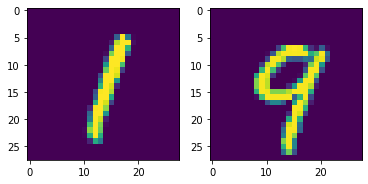

In [66]:
plt.subplot(1,2,1)
img = Image.fromarray(X_test[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_test[12])
plt.imshow(img)
print(Y_test[5],Y_test[12])

In [67]:
test_pred = model.predict(X_test)

In [68]:
Y_arg_max_list = [np.argmax(i) for i in test_pred]

In [69]:
Y_arg_max_list[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [70]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,Y_arg_max_list)
print(cnf_matrix)

[[ 971    0    1    0    2    1    1    1    2    1]
 [   0 1119    2    4    0    0    2    1    7    0]
 [   6    2  997    7    3    4    1    3    9    0]
 [   4    0   11  961    1    9    0    6   10    8]
 [   1    0    3    0  941    0    4    4    2   27]
 [   3    0    1   23    1  844    9    0    8    3]
 [   9    3    0    0    9    6  921    0   10    0]
 [   3    6   12    7    5    2    0  973    6   14]
 [   7    0    4   10    6    4    2    4  930    7]
 [   6    5    1   10    8    3    1    9    9  957]]


Text(0.5, 69.0, 'Predicted Labels')

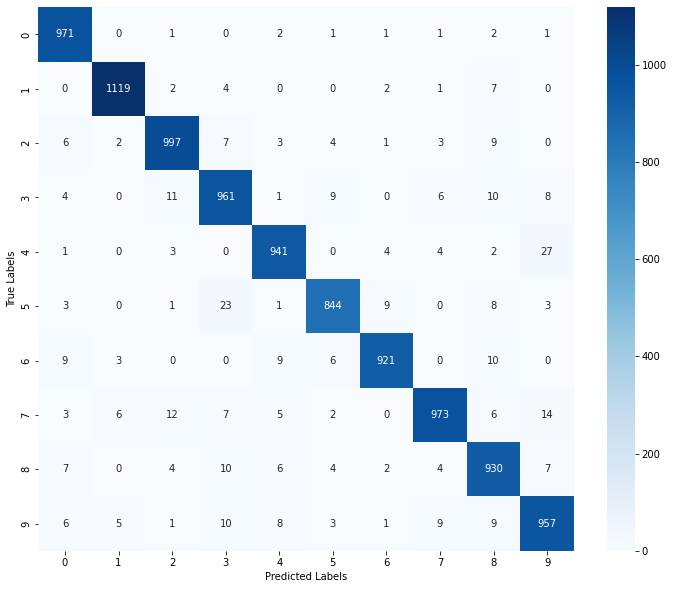

In [71]:
plt.figure(figsize=(12,10))
sns.heatmap(cnf_matrix,annot=True,cmap ='Blues',fmt='d')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

8

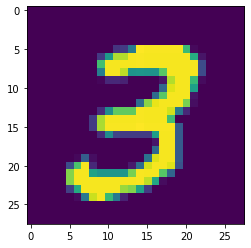

In [72]:
test_img = cv2.imread(r'MNIST_digit.png')
test_img = cv2.cvtColor(test_img,cv2.COLOR_RGB2GRAY)
test_img = cv2.resize(test_img,(28,28))
plt.imshow(test_img)
scaled_img = test_img/255
img_reshape = np.reshape(scaled_img,[1,28,28])
input_pred = model.predict(img_reshape)
np.argmax(input_pred)